# Breast Cancer Predicting Model

In this project we want to build a model that will help classify class of breast cancer (malignant or ‘bad’ versus benign or ‘good’). We use Logistic Regression model to achieve our results

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [33]:
# Load dataset
df_cancer = pd.read_csv('dataset/cancer.data', header = None)
df_cancer.head()

df_cancer__description = df_cancer.describe()
print(df_cancer__description)

                 0           1           2           3           4   \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               5           7           8           9           10  
count  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.437768    2.866953    1.589413    2.689557  
std      2.214300    2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.000000    1.000000    2.000000  
25%      2.000000   

In [34]:
# rename columns
df_cancer.rename(columns = {0 :'ID', 1 :'Clump Thickness', 2: 'Uniformity of Cell Size',
                        3:'Uniformity of Cell Shape', 4:'Marginal Adhesion', 5: 'Single Epithelial Cell Size',
                       6:'Bare Nuclei', 7:'Bland Chromatin', 8:'Normal Nucleoli',
                       9:'Mitoses', 10:'Class'}, inplace = True)

# Converting Class entries to binary
df_cancer['Class'] = df['Class'].replace([2,4], [1,0])

df_cancer.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,1.0
1,1002945,5,4,4,5,7,10,3,2,1,1.0
2,1015425,3,1,1,1,2,2,3,1,1,1.0
3,1016277,6,8,8,1,3,4,3,7,1,1.0
4,1017023,4,1,1,3,2,1,3,1,1,1.0


In [63]:
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

#Saving profile report into an html file titled dataset_report
profile.to_file(output_file="dataset_report.html")

In [35]:
#visualizing duplicated rows

duplicates = df_cancer[df_cancer.duplicated()]
duplicates

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class


In [36]:
df_cancer[df_cancer['ID'] == 1198641]

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
168,1198641,3,1,1,1,2,1,3,1,1,1.0
258,1198641,3,1,1,1,2,1,3,1,1,NaN
266,1198641,10,10,6,3,3,10,4,3,2,0.0


In [37]:
#dropping duplicates from the dataframe df
df_cancer = df_cancer.drop_duplicates()

#checking if the duplicated rows were dropped
len_duplicates = len(df_cancer[df_cancer.duplicated()])

print('There are a total of {0} duplicated rows in the dataframe df_cancer'.format(len_duplicates))

There are a total of 0 duplicated rows in the dataframe df_cancer


In [38]:
df_cancer["Bare Nuclei"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [52]:
#replace object with nan
df_cancer = df_cancer.replace('?', np.nan)

#display changes
df_cancer['Bare Nuclei'].unique()

array([0, 1, 2, 4, 3, 9, 7, 5, 8, 6])

In [53]:
# Iterate over each column of df
for col in df_cancer.columns:
    
    # Check if the column is of object type
    if df_cancer[col].dtypes == 'object':
        
        # Impute with the most frequent value
        df_cancer = df_cancer.fillna(df_cancer[col].value_counts().index[0])

In [54]:
# statistics summary

df_cancer.describe()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,1.188841,3.437768,2.866953,1.589413
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.134138,2.438364,3.053634,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,1.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000,10.000000


In [42]:
df_cancer.dtypes

ID                              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                          object
dtype: object

In [55]:
# Instantiate LabelEncoder
le =  LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df:
    # Compare if the dtype is object
    if df[col].dtypes =='object':
    # Use LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])
        
df.dtypes

ID                             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

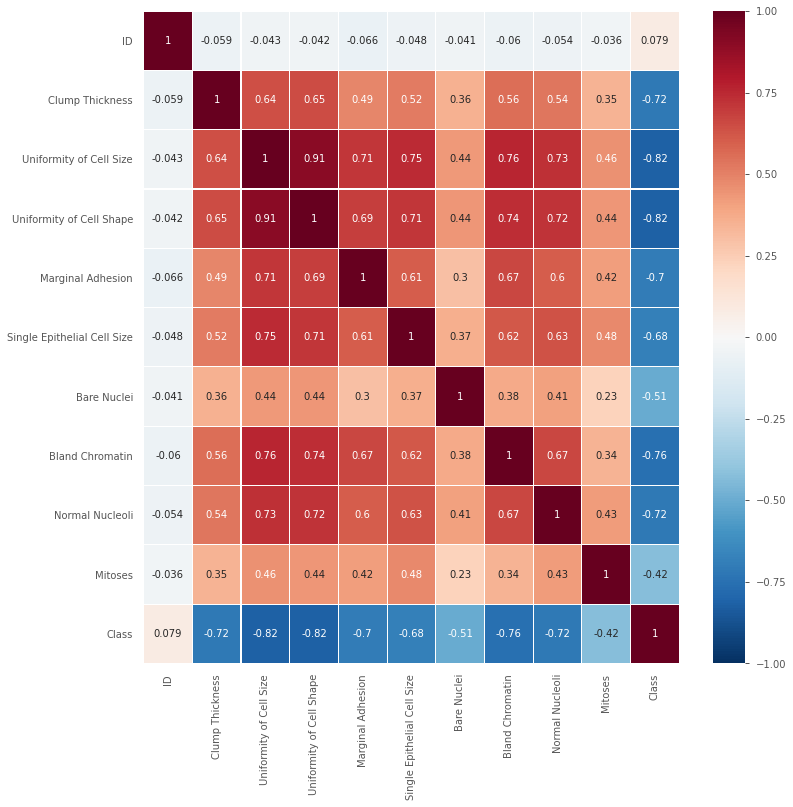

In [56]:
#computing correlation of dataset
corr = df.corr(method='pearson')
plt.figure(figsize=(12,12))
sns.heatmap(corr,cmap='RdBu_r', vmin=-1, vmax=1, annot=True, linewidth=0.1)

In [57]:
from scipy import stats

Clump_Thickness            = stats.pearsonr(df['Class'], df['Clump Thickness'])
Uniformity_of_cell_size    = stats.pearsonr(df['Class'], df['Uniformity of Cell Size'])
Bland_Chromatin            = stats.pearsonr(df['Class'], df['Bland Chromatin'])

print('Significant predictors of malignant cancer n their p_value:\n Clump Thickness   {0}\n Uniformity of Cell Size   {1}\n Bland Chromatin   {2}'.format(Clump_Thickness[1],Uniformity_of_cell_size[1],Bland_Chromatin[1]))

Significant predictors of malignant cancer n their p_value:
 Clump Thickness   4.70499803856329e-110
 Uniformity of Cell Size   2.0023333613836214e-167
 Bland Chromatin   2.957329851155397e-129


## Splitting the data set into train and test_sets

In [58]:
# Segregate features and labels into separate variables
X,y = df[['Clump Thickness','Uniformity of Cell Size','Bland Chromatin']] , df['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.30,
                                random_state=42)


In [59]:
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))

rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

## Fitting a logistic regression model to the train_sets

In [21]:
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

logreg.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 2.Confusion matrix of predicted and observed values

## Confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix

y_pred       = logreg.predict(rescaledX_test)
y_pred_train = logreg.predict(rescaledX_train)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier on test: ", logreg.score(rescaledX_test, y_test))

print("Accuracy of logistic regression classifier on train: ", logreg.score(rescaledX_train, y_train))

print('\nConfussion Matrix on testing data set')
confusion_matrix(y_pred, y_test)

Accuracy of logistic regression classifier on test:  0.9423076923076923
Accuracy of logistic regression classifier on train:  0.9399585921325052

Confussion Matrix on testing data set


array([[ 52,   2],
       [ 10, 144]])

## Classification report

In [23]:
from sklearn.metrics import classification_report


print('\nTest dataset-------------------------------------------')
print(classification_report(y_test, y_pred))
print('\nTrain dataset------------------------------------------')
print(classification_report(y_train, y_pred_train))


Test dataset-------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.84      0.90        62
           1       0.94      0.99      0.96       146

    accuracy                           0.94       208
   macro avg       0.95      0.91      0.93       208
weighted avg       0.94      0.94      0.94       208


Train dataset------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.89      0.91       176
           1       0.94      0.97      0.95       307

    accuracy                           0.94       483
   macro avg       0.94      0.93      0.93       483
weighted avg       0.94      0.94      0.94       483



# 3. Plot a Receiver Operating Characteristic (ROC) curve on the test data 

In [24]:
# Import ROC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

logreg_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, threshold_log = roc_curve(y_test, y_pred)

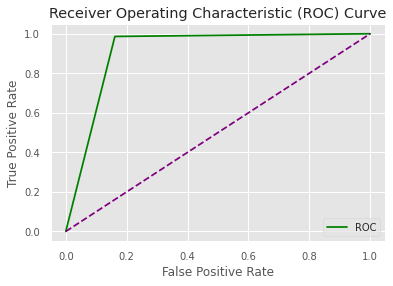

In [25]:
plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0, 1], [0, 1], color='purple', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 4.Overdispersion

In statistics, overdispersion is the presence of greater variability(statistical dispersion) in a data set than would be expected based on a given statistical model.

A common task in applied statistics is choosing a parametric model to fit a given set of empirical observations. This necessitates an assessment of the fit of the chosen model. It is usually possible to choose the model parameters in such a way that the theoretical population mean of the model is approximately equal to the sample mean. However, especially for simple models with few parameters, theoretical predictions may not match empirical observations for higher moments. When the observed variance is higher than the variance of a theoretical model, overdispersion has occurred. Conversely, underdispersion means that there was less variation in the data than predicted. Overdispersion is a very common feature in applied data analysis because in practice, populations are frequently heterogeneous (non-uniform) contrary to the assumptions implicit within widely used simple parametric models. 

## Logistic Regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.